# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

Saving free-nature-images.jpg to free-nature-images.jpg
Image loaded: free-nature-images.jpg
RGB shape: (630, 1200, 3)


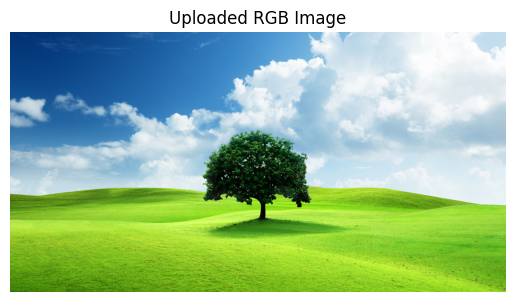

In [2]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

uploaded = files.upload()

filename = next(iter(uploaded))
img_pil = Image.open(filename).convert("RGB")
rgb = np.array(img_pil)

print("Image loaded:", filename)
print("RGB shape:", rgb.shape)

plt.imshow(rgb)
plt.axis("off")
plt.title("Uploaded RGB Image")
plt.show()

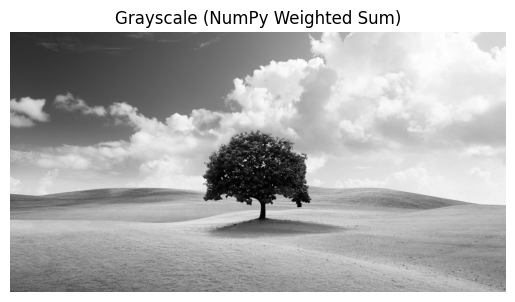

In [3]:
weights = np.array([0.2989, 0.5870, 0.1140])

gray_numpy = np.dot(rgb[...,:3], weights).astype(np.uint8)

plt.imshow(gray_numpy, cmap="gray")
plt.axis("off")
plt.title("Grayscale by NumPy Weighted Sum")
plt.show()

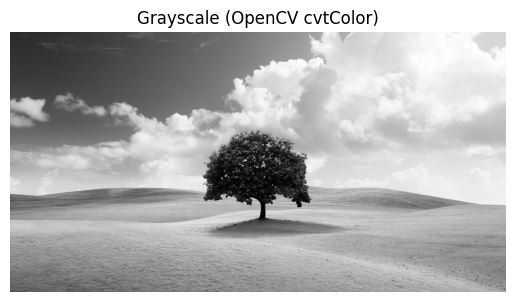

In [4]:
gray_cv = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_cv, cmap="gray")
plt.axis("off")
plt.title("Grayscale (OpenCV cvtColor)")
plt.show()

In [5]:
print("Array Shapes:")
print("RGB shape:", rgb.shape)
print("Grayscale (NumPy) shape:", gray_numpy.shape)
print("Grayscale (cv2) shape:", gray_cv.shape)

Array Shapes:
RGB shape: (630, 1200, 3)
Grayscale (NumPy) shape: (630, 1200)
Grayscale (cv2) shape: (630, 1200)


In [6]:
H, W = gray_numpy.shape
coords = [
    (H//4, W//4),
    (H//2, W//2),
    (3*H//4, 3*W//4)
]

print("Sample pixel values (y,x):")
for (y, x) in coords:
    print(f"({y},{x}) → RGB: {rgb[y,x].tolist()} | gray_numpy: {gray_numpy[y,x]} | gray_cv: {gray_cv[y,x]}")

Sample pixel values (y,x):
(157,300) → RGB: [32, 103, 169] | gray_numpy: 89 | gray_cv: 89
(315,600) → RGB: [0, 34, 0] | gray_numpy: 19 | gray_cv: 20
(472,900) → RGB: [169, 225, 76] | gray_numpy: 191 | gray_cv: 191


Max absolute difference: 1
Mean absolute difference: 0.523978835978836


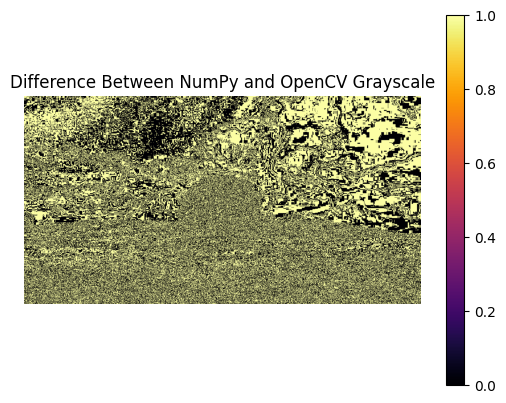

In [7]:
diff = gray_numpy.astype(int) - gray_cv.astype(int)

print("Max absolute difference:", np.max(np.abs(diff)))
print("Mean absolute difference:", np.mean(np.abs(diff)))

plt.imshow(np.abs(diff), cmap="inferno")
plt.axis("off")
plt.title("Difference Between NumPy and OpenCV Grayscale")
plt.colorbar()
plt.show()

In [8]:
print("RGB top-left 3×3 block:\n", rgb[:3,:3,:])
print("\nNumPy grayscale top-left 3×3 block:\n", gray_numpy[:3,:3])
print("\ncv2 grayscale top-left 3×3 block:\n", gray_cv[:3,:3])

RGB top-left 3×3 block:
 [[[  1  49 113]
  [  2  50 114]
  [  4  49 114]]

 [[  1  49 113]
  [  2  50 114]
  [  4  49 114]]

 [[  1  49 113]
  [  2  50 114]
  [  4  49 114]]]

NumPy grayscale top-left 3×3 block:
 [[41 42 42]
 [41 42 42]
 [41 42 42]]

cv2 grayscale top-left 3×3 block:
 [[42 43 43]
 [42 43 43]
 [42 43 43]]


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

### Prepare / load grayscale image

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

upload img


Saving free-nature-images.jpg to free-nature-images (1).jpg
shape: (630, 1200)


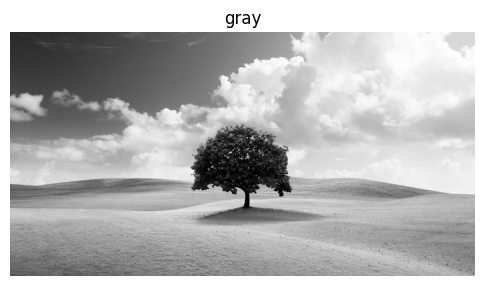

In [10]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import io

try:
    g
    print("using gray")
    x = g
except:
    try:
        g2
        print("using alt gray")
        x = g2
    except:
        print("upload img")
        up = files.upload()
        fn = next(iter(up))
        im = Image.open(fn).convert("RGB")
        r = np.array(im)
        x = (r[...,:3] @ np.array([0.2989,0.5870,0.1140])).astype(np.uint8)

if x.ndim == 3:
    x = x[...,0]

print("shape:", x.shape)

plt.figure(figsize=(6,6))
plt.imshow(x, cmap="gray")
plt.axis("off")
plt.title("gray")
plt.show()


### Compute FFT, shift, magnitude & phase

In [11]:
import numpy as np
import matplotlib.pyplot as plt

F = np.fft.fft2(x)
S = np.fft.fftshift(F)
M = np.abs(S)
L = 20*np.log10(M + 1e-8)
P = np.angle(S)

print("done fft")
print("F:", F.shape)
print("S:", S.shape)
print("M:", M.shape)
print("P:", P.shape)


done fft
F: (630, 1200)
S: (630, 1200)
M: (630, 1200)
P: (630, 1200)


### Display magnitude spectrum and phase

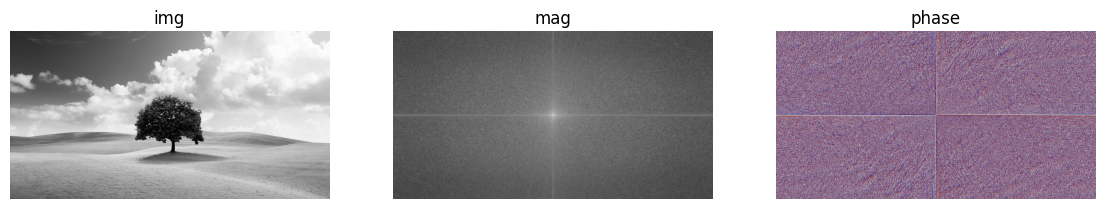

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
plt.imshow(x, cmap='gray')
plt.axis('off')
plt.title('img')

plt.subplot(1,3,2)
d = (L - L.min()) / (L.max() - L.min() + 1e-12)
plt.imshow(d, cmap='gray')
plt.axis('off')
plt.title('mag')

plt.subplot(1,3,3)
p = (P + np.pi) / (2*np.pi)
plt.imshow(p, cmap='twilight')
plt.axis('off')
plt.title('phase')

plt.show()


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

upload


Saving free-nature-images.jpg to free-nature-images (2).jpg
fft ok


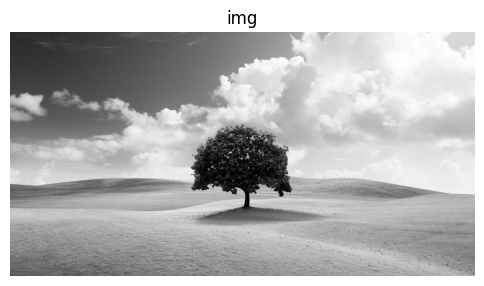

In [13]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

try:
    g0
    print("gray ok")
except:
    try:
        g2
        g0 = g2
        print("use alt")
    except:
        print("upload")
        up = files.upload()
        fn = next(iter(up))
        im = Image.open(fn).convert("RGB")
        r = np.array(im)
        g0 = (r[...,:3] @ np.array([0.2989,0.5870,0.1140])).astype(np.uint8)

if g0.ndim == 3:
    g0 = g0[...,0]

try:
    S
    F = np.fft.ifftshift(S)
    print("fft ok")
except:
    F = np.fft.fft2(g0)
    S = np.fft.fftshift(F)
    print("fft new")

plt.figure(figsize=(6,6))
plt.imshow(g0, cmap='gray')
plt.axis('off')
plt.title('img')
plt.show()


### Helper functions (mask makers, apply & reconstruct)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def c_mask(shape, r, center=None):
    H,W = shape
    cy,cx = (H//2, W//2) if center is None else center
    Y,X = np.ogrid[:H,:W]
    m = ((Y-cy)**2 + (X-cx)**2) <= r*r
    return m.astype(np.float32)

def s_mask(shape, side, center=None):
    H,W = shape
    cy,cx = (H//2, W//2) if center is None else center
    m = np.zeros(shape, dtype=np.float32)
    h = side//2
    y0 = max(0, cy-h)
    y1 = min(H, cy+h+(side%2))
    x0 = max(0, cx-h)
    x1 = min(W, cx+h+(side%2))
    m[y0:y1, x0:x1] = 1.0
    return m

def apply_mask(fshift, mask):
    fm = fshift * mask
    F = np.fft.ifftshift(fm)
    ib = np.fft.ifft2(F)
    ib = np.abs(ib)
    ib = ib - ib.min()
    mx = ib.max()
    if mx != 0:
        ib = ib / mx
    ib = (ib * 255).astype(np.uint8)
    return ib, fm


### Create 3 circular LPF masks (radii 10,30,80), apply & display

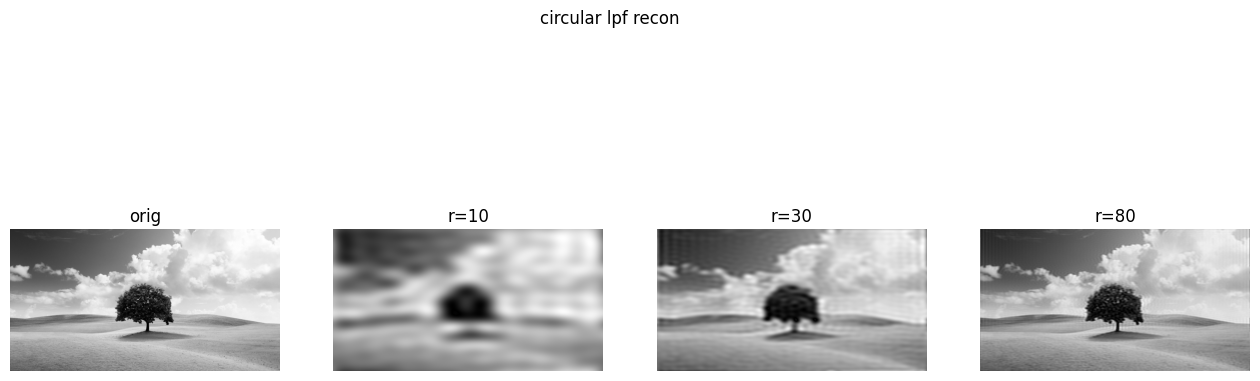

saved recon_r10.png
saved recon_r30.png
saved recon_r80.png


In [17]:
rads=[10,30,80]
try:
    H,W=S.shape
    Fshift=S
except:
    H,W=fshift.shape
    Fshift=fshift

out=[]
for r in rads:
    m=c_mask((H,W),r)
    im,fm=apply_mask(Fshift,m)
    out.append((r,m,im))

plt.figure(figsize=(16,6))
plt.subplot(1,len(rads)+1,1)
img_display = x if 'x' in globals() else (g0 if 'g0' in globals() else (gray_img if 'gray_img' in globals() else None))
plt.imshow(img_display, cmap='gray')
plt.title('orig'); plt.axis('off')

for i,(r,m,im) in enumerate(out, start=2):
    plt.subplot(1,len(rads)+1,i)
    plt.imshow(im, cmap='gray')
    plt.title(f'r={r}'); plt.axis('off')

plt.suptitle('circular lpf recon'); plt.show()

for r,m,im in out:
    fn=f"recon_r{r}.png"
    plt.imsave(fn, im, cmap='gray')
    print("saved",fn)

### Create & apply HPF (radius 30) and reconstruct

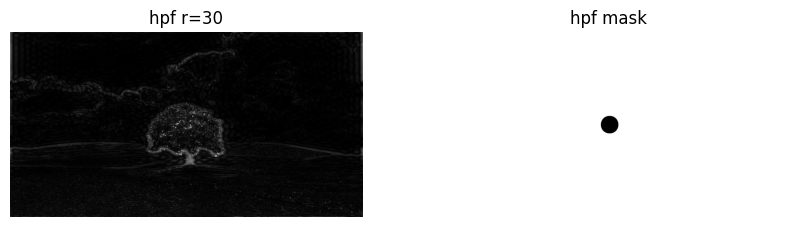

saved recon_hpf_r30.png


In [18]:
r=30
try:
    H,W=S.shape; F=S
except:
    H,W=fshift.shape; F=fshift

m=c_mask((H,W),r)
h=1.0-m
im,fm=apply_mask(F,h)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray'); plt.title(f'hpf r={r}'); plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(h,cmap='gray'); plt.title('hpf mask'); plt.axis('off')

plt.show()

fn=f"recon_hpf_r{r}.png"
plt.imsave(fn,im,cmap='gray')
print("saved",fn)


### Create & apply square LPF mask

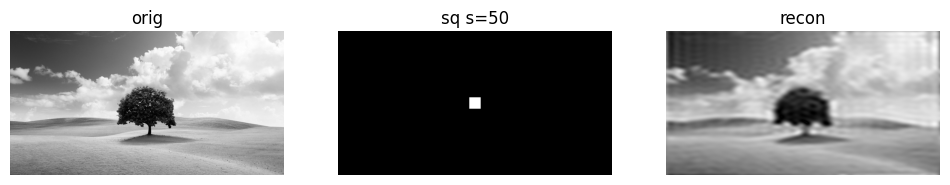

saved recon_sq_50.png


In [19]:
s=50
try:
    H,W=S.shape; F=S
except:
    H,W=fshift.shape; F=fshift

m=s_mask((H,W),s)
im,fm=apply_mask(F,m)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(x if 'x' in globals() else gray_img, cmap='gray')
plt.title('orig'); plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(m, cmap='gray')
plt.title(f'sq s={s}'); plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(im, cmap='gray')
plt.title('recon'); plt.axis('off')

plt.show()

fn=f"recon_sq_{s}.png"
plt.imsave(fn, im, cmap='gray')
print("saved", fn)


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

gray ok
fft ok


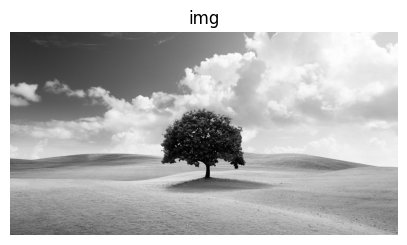

In [20]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

try:
    g0
    print("gray ok")
except:
    try:
        g2
        g0 = g2
        print("alt gray")
    except:
        print("upload")
        up = files.upload()
        fn = next(iter(up))
        im = Image.open(fn).convert("RGB")
        r = np.array(im)
        g0 = (r[...,:3] @ np.array([0.2989,0.5870,0.1140])).astype(np.uint8)

try:
    S
    print("fft ok")
except:
    F = np.fft.fft2(g0)
    S = np.fft.fftshift(F)
    print("fft new")

plt.figure(figsize=(5,5))
plt.imshow(g0, cmap='gray')
plt.axis('off')
plt.title('img')
plt.show()


### Phase-only reconstruction

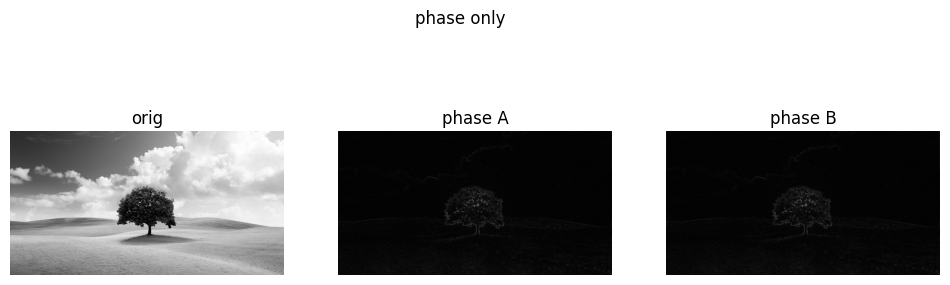

pc abs: 0.9999999999998092 1.0000000000000004
pa abs: 0.9999999999999998 1.0000000000000002


In [21]:
import numpy as np
import matplotlib.pyplot as plt

e=1e-12
pc = S / (np.abs(S)+e)
pa = np.exp(1j*np.angle(S))

def rec(Z):
    z = np.fft.ifftshift(Z)
    z = np.fft.ifft2(z)
    z = np.abs(z)
    z -= z.min()
    m = z.max()
    if m!=0: z /= m
    return (z*255).astype(np.uint8)

r1 = rec(pc)
r2 = rec(pa)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(g0, cmap='gray'); plt.title('orig'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(r1, cmap='gray'); plt.title('phase A'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(r2, cmap='gray'); plt.title('phase B'); plt.axis('off')
plt.suptitle('phase only'); plt.show()

print("pc abs:", np.abs(pc).min(), np.abs(pc).max())
print("pa abs:", np.abs(pa).min(), np.abs(pa).max())


### Try reconstruction from np.angle(fshift)

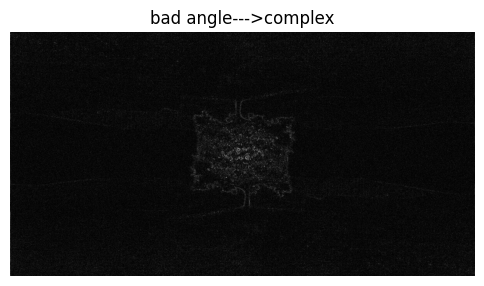

recon produced (not meaningful)


In [23]:
import numpy as np
import matplotlib.pyplot as plt

try:
    F0 = S
except:
    F0 = fshift

a = np.angle(F0)
try:
    z = a.astype(np.complex128)
    z = np.fft.ifftshift(z)
    z = np.fft.ifft2(z)
    z = np.abs(z)
    z -= z.min()
    m = z.max()
    if m != 0: z /= m
    out = (z*255).astype(np.uint8)

    plt.figure(figsize=(6,4))
    plt.imshow(out, cmap='gray'); plt.title('bad angle--->complex'); plt.axis('off')
    plt.show()
    print("recon produced (not meaningful)")
except Exception as err:
    print("failed:", err)

### Magnitude only reconstruction and log magnitude experiment

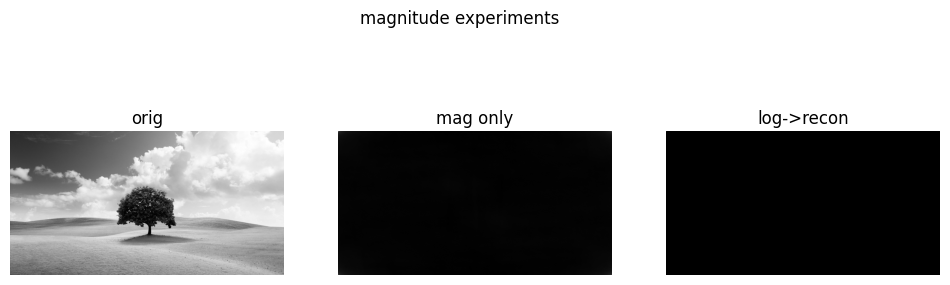

done: mag-only & log experiments
Notes:
- Magnitude-only reconstruction (phase=0) usually produces an image with radially symmetric / blurry appearance.
- This is because all directional phase information is lost; magnitude alone contains frequency-strengths but not how those frequencies align.
- Logarithm is used for visualization of magnitude spectrum (compress dynamic range so details are visible).
- Using log(magnitude) as amplitudes for inverse FFT is not the inverse operation of the log used for display and will generally produce meaningless images.


In [25]:
import numpy as np
import matplotlib.pyplot as plt

e = 1e-12
try:
    F0 = S
except:
    F0 = fshift

m = np.abs(F0)
mc = m.astype(np.complex128)
r_mag = rec(mc)

ml = np.log(m + e)
mlc = ml.astype(np.complex128)
r_log = rec(mlc)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(g0 if 'g0' in globals() else (x if 'x' in globals() else gray_img), cmap='gray'); plt.title('orig'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(r_mag, cmap='gray'); plt.title('mag only'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(r_log, cmap='gray'); plt.title('log->recon'); plt.axis('off')
plt.suptitle('magnitude experiments'); plt.show()

print("done: mag-only & log experiments")

print("Notes:")
print("- Magnitude-only reconstruction (phase=0) usually produces an image with radially symmetric / blurry appearance.")
print("- This is because all directional phase information is lost; magnitude alone contains frequency-strengths but not how those frequencies align.")
print("- Logarithm is used for visualization of magnitude spectrum (compress dynamic range so details are visible).")
print("- Using log(magnitude) as amplitudes for inverse FFT is not the inverse operation of the log used for display and will generally produce meaningless images.")



In [26]:
import matplotlib.pyplot as plt

plt.imsave("pA.png", r1, cmap='gray')
plt.imsave("pB.png", r2, cmap='gray')
plt.imsave("mA.png", r_mag, cmap='gray')
plt.imsave("mL.png", r_log, cmap='gray')

print("saved pA pB mA mL")

def st(im):
    return {"min":int(im.min()),"max":int(im.max()),"mean":float(im.mean()),"std":float(im.std())}

print("orig:", st(g0 if 'g0' in globals() else gray_img))
print("pA:", st(r1))
print("pB:", st(r2))
print("mA:", st(r_mag))
print("mL:", st(r_log))


saved pA pB mA mL
orig: {'min': 0, 'max': 254, 'mean': 164.9775052910053, 'std': 58.66895780896559}
pA: {'min': 0, 'max': 255, 'mean': 5.91989417989418, 'std': 7.989680579096881}
pB: {'min': 0, 'max': 255, 'mean': 5.91989417989418, 'std': 7.989680579096881}
mA: {'min': 0, 'max': 255, 'mean': 3.508404761904762, 'std': 2.1632373948885015}
mL: {'min': 0, 'max': 255, 'mean': 0.00043253968253968256, 'std': 0.2949864550731433}


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

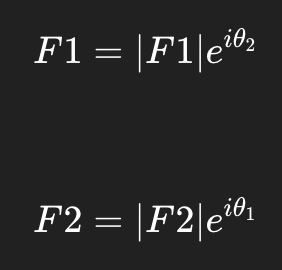

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [30]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

print("upload img A")
u1 = files.upload()
n1 = next(iter(u1))

print("upload img B")
u2 = files.upload()
n2 = next(iter(u2))

def lg(fn):
    im = Image.open(fn).convert("RGB")
    a = np.array(im)
    return (a[..., :3] @ np.array([0.2989,0.5870,0.1140])).astype(np.float32)

A = lg(n1)
B = lg(n2)
if A.shape != B.shape:
    B = resize(B, A.shape, preserve_range=True).astype(np.float32)

F1 = np.fft.fftshift(np.fft.fft2(A))
F2 = np.fft.fftshift(np.fft.fft2(B))
M1, P1 = np.abs(F1), np.angle(F1)
M2, P2 = np.abs(F2), np.angle(F2)

print("ready")


upload img A


Saving img1.jpg to img1 (1).jpg
upload img B


Saving img2.jpg to img2 (1).jpg
ready


### Swap magnitude and phase, reconstruct, display results

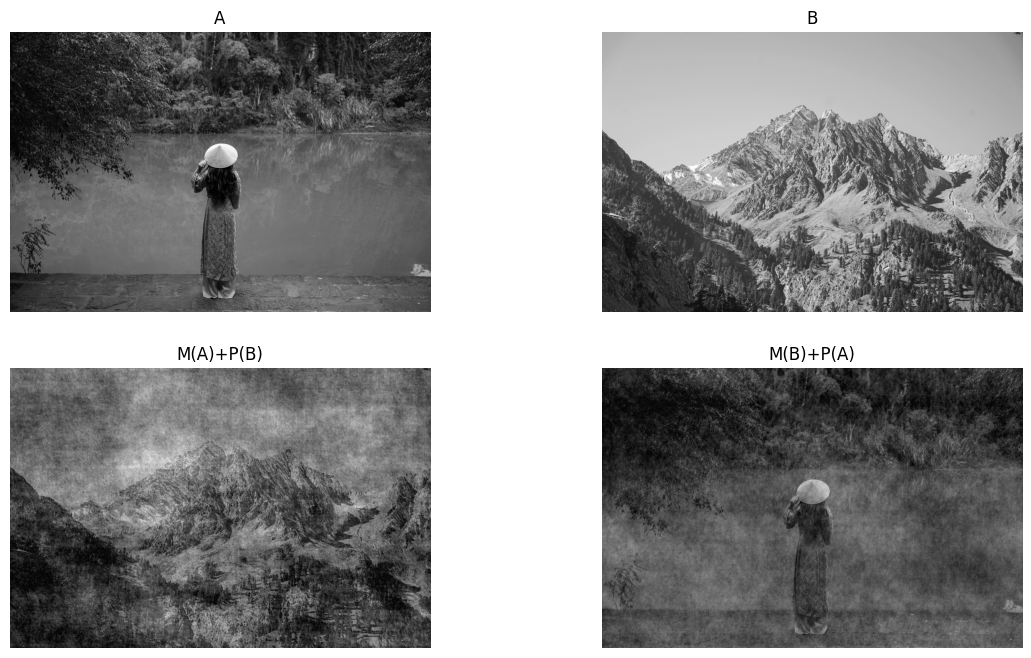

done


In [31]:
import numpy as np
import matplotlib.pyplot as plt

def r(m,p):
    F = m * np.exp(1j * p)
    F = np.fft.ifftshift(F)
    z = np.fft.ifft2(F)
    z = np.abs(z)
    z -= z.min()
    mx = z.max() + 1e-12
    return z / mx

C12 = r(M1, P2)
C21 = r(M2, P1)

plt.figure(figsize=(14,8))
plt.subplot(2,2,1); plt.imshow(A, cmap='gray'); plt.title('A'); plt.axis('off')
plt.subplot(2,2,2); plt.imshow(B, cmap='gray'); plt.title('B'); plt.axis('off')
plt.subplot(2,2,3); plt.imshow(C12, cmap='gray'); plt.title('M(A)+P(B)'); plt.axis('off')
plt.subplot(2,2,4); plt.imshow(C21, cmap='gray'); plt.title('M(B)+P(A)'); plt.axis('off')
plt.show()

print("done")


OBSERVATION:
The images reconstructed with swapped phases strongly resemble the phase donor image.
This shows that phase carries most of the structural and spatial information i.e. edges, shapes, layout.
Magnitude mainly contributes texture & intensity distribution, but without phase it cannot reconstruct structure.
Therefore;
Phase = structure / geometry of the image
Magnitude = texture / contrast distribution
This is why combo12 looks structurally like Image 2 i.e. its phase,
and combo21 looks structurally like Image 1.